<a href="https://colab.research.google.com/github/mofanchang/ptt-Word-Embedding-sentiment-analysis/blob/main/ptt_lifeismoney_tiltle_kmeans%E5%88%86%E7%BE%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import sys
from gensim.models import word2vec
import os
import gensim
from gensim.models.word2vec import LineSentence
import jieba

In [6]:
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt')

s = open('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt','rb').read()

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.703 seconds.
DEBUG:jieba:Loading model cost 0.703 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [7]:
#讀數據
data = open('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt','rb').read()

In [8]:
import pandas as pd

# Read the text file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt', sep='\t', header=None)

# Write the dataframe to a CSV file
data=df.to_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.csv', index=False)
data

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.csv')
data

,0
0,文章名稱
1,標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯
2,標題: Re: [情報] iHerb 年底清倉低至4折！
3,標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免
4,標題: [情報] Line Point 15
...,...
1913,標題: [情報] 10/30台北捐血送【電影票】或【禮券】
1914,標題: [情報] 10/9邀請好友拿LINE POINTS 300點
1915,標題: [情報] 無線藍芽耳機JLAB GO AIR POP TONES $870
1916,標題: [情報] 買3M無痕 送吹風機活動


In [10]:
data.rename(columns={'文章名稱': 'x'}, inplace=True)

In [11]:
print(data)

                                              0
0                                          文章名稱
1               標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯
2                  標題: Re: [情報] iHerb 年底清倉低至4折！
3                標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免
4                        標題: [情報] Line Point 15
...                                         ...
1913             標題: [情報] 10/30台北捐血送【電影票】或【禮券】 
1914         標題: [情報] 10/9邀請好友拿LINE POINTS 300點
1915  標題: [情報] 無線藍芽耳機JLAB GO AIR POP TONES $870
1916                      標題: [情報] 買3M無痕 送吹風機活動
1917             標題: [情報] PC限時全站P幣加碼/伊萊克斯限時買大送小

[1918 rows x 1 columns]


In [12]:

import jieba
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt')
stop = [line.strip() for line in open('/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt').readlines()]

In [13]:
#去停用詞
out = ''
for index in range(len(data)):
    ct = jieba.cut(data.loc[index,'0'])
    out = ''
    for word in ct:
        if word not in stop:
            out += word
            out += " "
    data.loc[index,'split'] = out

In [14]:
data

,0,split
0,文章名稱,文章 名稱
1,標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯,標題 : [ 情報 ] 12 / 11 「 花蓮 」 捐血 送 全聯禮券 400 +...
2,標題: Re: [情報] iHerb 年底清倉低至4折！,標題 : Re : [ 情報 ] iHerb 年底 清倉 低 至 4 折 ！
3,標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免,標題 : [ 情報 ] 雷亞 Cytus II 手機 音樂遊戲 限免
4,標題: [情報] Line Point 15,標題 : [ 情報 ] Line Point 15
...,...,...
1913,標題: [情報] 10/30台北捐血送【電影票】或【禮券】,標題 : [ 情報 ] 10 / 30 台北 捐血 送 【 電影票 】 或 【 禮券...
1914,標題: [情報] 10/9邀請好友拿LINE POINTS 300點,標題 : [ 情報 ] 10 / 9 邀請 好友 拿 LINE POINTS ...
1915,標題: [情報] 無線藍芽耳機JLAB GO AIR POP TONES $870,標題 : [ 情報 ] 無線 藍芽 耳機 JLAB GO AIR POP...
1916,標題: [情報] 買3M無痕 送吹風機活動,標題 : [ 情報 ] 買 3M 無痕 送 吹 風機 活動


In [15]:
df = data.iloc[:100,:1]
df.to_csv("first_100_rows.csv",index=False)
df

,0
0,文章名稱
1,標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯
2,標題: Re: [情報] iHerb 年底清倉低至4折！
3,標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免
4,標題: [情報] Line Point 15
...,...
95,標題: [情報] 羅技 G413 se 機械鍵盤
96,標題: [情報] 繼光香香雞買大送中
97,標題: [情報] 瑞米高負重氣壓式鋁合金螢幕支架 $999
98,標題: [情報] 【台北】捐血12/11送電影票，12/14送禮


In [16]:
import pprint
text = data['split']
sentences = []
for item in text:
    sentence = str(item).split(' ')
    sentences.append(sentence)

In [17]:
#訓練
model = word2vec.Word2Vec(sentences,size = 50)
model.save('jk.model')

In [18]:
def buildWordVector(imdb_w2v,text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    #print text
    for word in text.split():
        #print word
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            print (word)
            continue
    if count != 0:
        vec /= count
    return vec

In [19]:
result = buildWordVector(model, data.loc[1]['split'] , 50)
for i in range(1,len(data)):
    result = np.concatenate((result, buildWordVector(model, data.loc[i]['split'] , 50)), axis = 0)

<ipython-input-18-0eff7c4131be>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += imdb_w2v[word].reshape((1, size))


串流輸出內容已截斷至最後 5000 行。
現領
美金
德國
頂級
魚油
入組
14999
雞塊
大薯
薯餅
通通
麥當
勞連
五感
謝祭
代幣
等你拿
拍雙
賺超
贈點
ASICS
GEL
EXCITE
淘寶雙
總
SAMSUNG
連網
15900
慶生
組合價
1888
SanDisk
Extreme
紅金卡
256G
70
邁紀
錄器
漫步者
完整
觀劇
悠活
原力
維生
D
錠
G
PLUS
頸掛
電暖
懷爐
GP
WH001N
內湖
誠鮮
吃
飽
日到
GOOGLE
安裝
節感
謝有
你
互贈
多
那
之
WEMO
年度
回顧
人人
有獎
蘭蔻
小黑
2620
sidenotes
let
'
cafe
接近
文旦
一顆
週三
非
店家
能
收納
組共
個掛
鉤
bookwalker
購書
三商
拿坡
里
Switch
紅藍主機
6990
MIZUNO
WAVE
遠雄
海洋
公園
點折
北
市
中正
延平
鹽地
番茄
49
飛夢妮
12.12
券有
全台
CUP
GO
來速
站點
大杯
第
15%
超市
HP
15s
eq2173AU
極地白
智米
AP
2999
中嘉
寬頻
升速
案
今日
熱
百靈油
100ml
1380
超值
兑
龍泰起
司條
5.75
A5
骰子
牛
朱記
清燉
牛肉
資生堂
遠傳倍
潔雅
x56
589
Persil
寶瀅
三合一
膠囊
DHC
純欖護
脣膏
全自動
NC
A701
巴哈姆
特
戰神
同
梱
19380
大量
到貨
中嘉固網
friday
現省
1194
AROMASE
艾瑪絲
草本
去屑
90mL
蘭芝
11.11
阪急
掃地機
9999
益力
壯
清力
穩力
一送
一
2002R
3199
％
完成
測驗
領取
Vana
Candles
全品
項
九折
h
ygo
國內
調漲
黛安芬
拿坡里
品川
蘭
年末
牌空氣
歡度
平安夜
自來
水園區
明免
費入園
Ubereat
新用戶
折代碼
櫻桃
小丸子
桌
Well
Q7
8748
樂歌
支架
＋
15%
pCloud
人人
有獎
SAMSUNG
T7
移動
固態
KUDI
廚餘機
4%
送補
蚊燈
漢堡
取貨送
77
另
隨取
卡將
上市
當日
170
鯊
不用
萬元
FILA
小白鞋
SONY
WH
1000XM5
耳罩
8289
金車
皇室
羽毛
工房
羽絨


In [20]:
result

array([[-0.28955942, -0.11097346, -0.11310275, ..., -0.23652037,
        -0.30947958,  0.09463844],
       [-0.28955942, -0.11097346, -0.11310275, ..., -0.23652037,
        -0.30947958,  0.09463844],
       [-0.305644  , -0.09628952, -0.1694386 , ..., -0.1763581 ,
        -0.24746649,  0.08793707],
       ...,
       [-0.32419475, -0.088843  , -0.20138566, ..., -0.15178643,
        -0.227028  ,  0.08436872],
       [-0.29183494, -0.0959103 , -0.15244353, ..., -0.18320172,
        -0.25207355,  0.08520179],
       [-0.26077605, -0.09257103, -0.11946219, ..., -0.18597715,
        -0.24737929,  0.07936163]])

In [21]:
vectors = pd.DataFrame(result, columns = ["x1","x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31", "x32", "x33", "x34", "x35", "x36", "x37", "x38" ,"x39", "x40", "x41", "x42", "x43" ,"x44", "x45", "x46" ,"x47", "x48", "x49", "x50"])
vectors

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,-0.289559,-0.110973,-0.113103,-0.206750,-0.434598,-0.485367,-0.108883,0.081839,0.061150,0.137563,...,0.238271,0.196827,0.414127,0.173828,-0.187221,0.645684,-0.028234,-0.236520,-0.309480,0.094638
1,-0.289559,-0.110973,-0.113103,-0.206750,-0.434598,-0.485367,-0.108883,0.081839,0.061150,0.137563,...,0.238271,0.196827,0.414127,0.173828,-0.187221,0.645684,-0.028234,-0.236520,-0.309480,0.094638
2,-0.305644,-0.096290,-0.169439,-0.246289,-0.332161,-0.436326,-0.042780,0.105089,0.055057,0.156430,...,0.194807,0.250567,0.352586,0.177408,-0.169065,0.581249,0.009864,-0.176358,-0.247466,0.087937
3,-0.313922,-0.078144,-0.208429,-0.272826,-0.242678,-0.388389,0.018058,0.124116,0.042072,0.165490,...,0.157164,0.288729,0.290997,0.174781,-0.150607,0.510676,0.038371,-0.125651,-0.189091,0.080741
4,-0.326805,-0.091814,-0.202145,-0.274765,-0.308504,-0.435987,-0.015476,0.127067,0.050161,0.170288,...,0.182014,0.288510,0.343559,0.189724,-0.173243,0.583249,0.026639,-0.164863,-0.235055,0.088007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,-0.266982,-0.103719,-0.101855,-0.189223,-0.404536,-0.444847,-0.098167,0.076581,0.057700,0.129716,...,0.214056,0.180610,0.383156,0.163152,-0.171739,0.596343,-0.023420,-0.219679,-0.286759,0.084403
1914,-0.288660,-0.104187,-0.134056,-0.214501,-0.386660,-0.454414,-0.080154,0.089370,0.056382,0.142966,...,0.212771,0.210710,0.383099,0.173678,-0.173544,0.606852,-0.011974,-0.212316,-0.277544,0.085263
1915,-0.324195,-0.088843,-0.201386,-0.271278,-0.294516,-0.426201,-0.008339,0.118784,0.048149,0.166146,...,0.178021,0.284589,0.332400,0.184437,-0.165424,0.566346,0.027300,-0.151786,-0.227028,0.084369
1916,-0.291835,-0.095910,-0.152444,-0.231030,-0.340800,-0.425702,-0.052166,0.097136,0.055049,0.146186,...,0.195097,0.229351,0.351616,0.170071,-0.164935,0.569520,0.002957,-0.183202,-0.252074,0.085202


In [22]:
#合併dataframe
data = pd.concat([data, vectors], axis = 1)
data

,0,split,x1,x2,x3,x4,x5,x6,x7,x8,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,文章名稱,文章 名稱,-0.289559,-0.110973,-0.113103,-0.206750,-0.434598,-0.485367,-0.108883,0.081839,...,0.238271,0.196827,0.414127,0.173828,-0.187221,0.645684,-0.028234,-0.236520,-0.309480,0.094638
1,標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯,標題 : [ 情報 ] 12 / 11 「 花蓮 」 捐血 送 全聯禮券 400 +...,-0.289559,-0.110973,-0.113103,-0.206750,-0.434598,-0.485367,-0.108883,0.081839,...,0.238271,0.196827,0.414127,0.173828,-0.187221,0.645684,-0.028234,-0.236520,-0.309480,0.094638
2,標題: Re: [情報] iHerb 年底清倉低至4折！,標題 : Re : [ 情報 ] iHerb 年底 清倉 低 至 4 折 ！,-0.305644,-0.096290,-0.169439,-0.246289,-0.332161,-0.436326,-0.042780,0.105089,...,0.194807,0.250567,0.352586,0.177408,-0.169065,0.581249,0.009864,-0.176358,-0.247466,0.087937
3,標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免,標題 : [ 情報 ] 雷亞 Cytus II 手機 音樂遊戲 限免,-0.313922,-0.078144,-0.208429,-0.272826,-0.242678,-0.388389,0.018058,0.124116,...,0.157164,0.288729,0.290997,0.174781,-0.150607,0.510676,0.038371,-0.125651,-0.189091,0.080741
4,標題: [情報] Line Point 15,標題 : [ 情報 ] Line Point 15,-0.326805,-0.091814,-0.202145,-0.274765,-0.308504,-0.435987,-0.015476,0.127067,...,0.182014,0.288510,0.343559,0.189724,-0.173243,0.583249,0.026639,-0.164863,-0.235055,0.088007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,標題: [情報] 10/30台北捐血送【電影票】或【禮券】,標題 : [ 情報 ] 10 / 30 台北 捐血 送 【 電影票 】 或 【 禮券...,-0.266982,-0.103719,-0.101855,-0.189223,-0.404536,-0.444847,-0.098167,0.076581,...,0.214056,0.180610,0.383156,0.163152,-0.171739,0.596343,-0.023420,-0.219679,-0.286759,0.084403
1914,標題: [情報] 10/9邀請好友拿LINE POINTS 300點,標題 : [ 情報 ] 10 / 9 邀請 好友 拿 LINE POINTS ...,-0.288660,-0.104187,-0.134056,-0.214501,-0.386660,-0.454414,-0.080154,0.089370,...,0.212771,0.210710,0.383099,0.173678,-0.173544,0.606852,-0.011974,-0.212316,-0.277544,0.085263
1915,標題: [情報] 無線藍芽耳機JLAB GO AIR POP TONES $870,標題 : [ 情報 ] 無線 藍芽 耳機 JLAB GO AIR POP...,-0.324195,-0.088843,-0.201386,-0.271278,-0.294516,-0.426201,-0.008339,0.118784,...,0.178021,0.284589,0.332400,0.184437,-0.165424,0.566346,0.027300,-0.151786,-0.227028,0.084369
1916,標題: [情報] 買3M無痕 送吹風機活動,標題 : [ 情報 ] 買 3M 無痕 送 吹 風機 活動,-0.291835,-0.095910,-0.152444,-0.231030,-0.340800,-0.425702,-0.052166,0.097136,...,0.195097,0.229351,0.351616,0.170071,-0.164935,0.569520,0.002957,-0.183202,-0.252074,0.085202


In [23]:
#把series 轉換成dataframe格式，並且將五十維的特徵都賦值
vectors = pd.DataFrame(result, columns = ["x1","x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31", "x32", "x33", "x34", "x35", "x36", "x37", "x38" ,"x39", "x40", "x41", "x42", "x43" ,"x44", "x45", "x46" ,"x47", "x48", "x49", "x50"])
vectors

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,-0.289559,-0.110973,-0.113103,-0.206750,-0.434598,-0.485367,-0.108883,0.081839,0.061150,0.137563,...,0.238271,0.196827,0.414127,0.173828,-0.187221,0.645684,-0.028234,-0.236520,-0.309480,0.094638
1,-0.289559,-0.110973,-0.113103,-0.206750,-0.434598,-0.485367,-0.108883,0.081839,0.061150,0.137563,...,0.238271,0.196827,0.414127,0.173828,-0.187221,0.645684,-0.028234,-0.236520,-0.309480,0.094638
2,-0.305644,-0.096290,-0.169439,-0.246289,-0.332161,-0.436326,-0.042780,0.105089,0.055057,0.156430,...,0.194807,0.250567,0.352586,0.177408,-0.169065,0.581249,0.009864,-0.176358,-0.247466,0.087937
3,-0.313922,-0.078144,-0.208429,-0.272826,-0.242678,-0.388389,0.018058,0.124116,0.042072,0.165490,...,0.157164,0.288729,0.290997,0.174781,-0.150607,0.510676,0.038371,-0.125651,-0.189091,0.080741
4,-0.326805,-0.091814,-0.202145,-0.274765,-0.308504,-0.435987,-0.015476,0.127067,0.050161,0.170288,...,0.182014,0.288510,0.343559,0.189724,-0.173243,0.583249,0.026639,-0.164863,-0.235055,0.088007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,-0.266982,-0.103719,-0.101855,-0.189223,-0.404536,-0.444847,-0.098167,0.076581,0.057700,0.129716,...,0.214056,0.180610,0.383156,0.163152,-0.171739,0.596343,-0.023420,-0.219679,-0.286759,0.084403
1914,-0.288660,-0.104187,-0.134056,-0.214501,-0.386660,-0.454414,-0.080154,0.089370,0.056382,0.142966,...,0.212771,0.210710,0.383099,0.173678,-0.173544,0.606852,-0.011974,-0.212316,-0.277544,0.085263
1915,-0.324195,-0.088843,-0.201386,-0.271278,-0.294516,-0.426201,-0.008339,0.118784,0.048149,0.166146,...,0.178021,0.284589,0.332400,0.184437,-0.165424,0.566346,0.027300,-0.151786,-0.227028,0.084369
1916,-0.291835,-0.095910,-0.152444,-0.231030,-0.340800,-0.425702,-0.052166,0.097136,0.055049,0.146186,...,0.195097,0.229351,0.351616,0.170071,-0.164935,0.569520,0.002957,-0.183202,-0.252074,0.085202


In [24]:
df=vectors.to_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/vectors.csv')

In [25]:
df1 = vectors.iloc[:, 1]
df1

0      -0.110973
1      -0.110973
2      -0.096290
3      -0.078144
4      -0.091814
          ...   
1913   -0.103719
1914   -0.104187
1915   -0.088843
1916   -0.095910
1917   -0.092571
Name: x2, Length: 1918, dtype: float64

In [26]:
df1.to_csv('df1.csv', index=False)

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
dt= data.drop(['0', 'split'],axis=1)

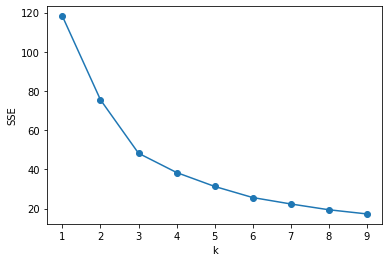

In [36]:
#找出最佳kMeans值
SSE =[]
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(vectors)
    SSE.append(model.inertia_)
X = range(1,10)
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()

In [30]:

from gensim.models import Word2Vec
import nltk
from nltk.cluster import KMeansClusterer
import jieba
import numpy as np
  
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE

In [31]:
df = pd.DataFrame(vectors)
df = df.values.reshape(-1,1)

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# 轉化為二維數組
df = pd.DataFrame(vectors)
df = df.values.reshape(-1,1)

# k-means演算法
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [33]:
from sklearn.decomposition import PCA

In [34]:
# 引入上述將文章斷詞後轉為300維向量的資料
rawWordVec = vectors
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

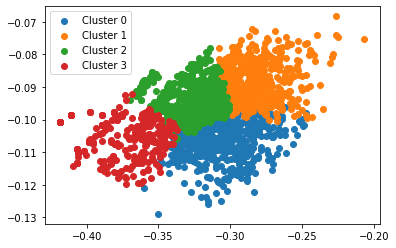

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data
X = np.array(vectors)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the data points, colored based on their cluster labels
for label in set(labels):
    cluster = X[labels == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {label}")

plt.legend()
plt.show()
